In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn configuration
sns.set_theme()
# sns.set(rc={'figure.figsize':(15,9)})

## Load dataset

In [57]:
df = pd.read_csv('data/othello_dataset.csv')

# Remove online game id
df = df.drop('eOthello_game_id', 1)

# Rename columns
df = df.rename(columns={'winner': 'result', 'game_moves': 'moves'})

# Convert 'result' to string
# 1 => Black | 0 => Draw | -1 => White
def result_to_str(r):
    if r == 1:
        return'black'
    if r == 0:
        return 'draw'
    if r == -1:
        return 'white'

df['result'] = df['result'].apply(result_to_str)

# Remove duplicates
df = df.drop_duplicates()

print(df.info(verbose=False))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25649 entries, 0 to 25656
Columns: 2 entries, result to moves
dtypes: object(2)
memory usage: 601.1+ KB
None
  result                                              moves
0  black  f5d6c4d3e6f4e3f6c5b4e7f3c6d7b5a5c3b3g5h5g4h4e2...
1  white  d3c5f6f5e6e3d6f7b6d7e2c6d8c4e7c3f4c8c7d2d1a6b3...
2  black  f5d6c4d3c3f4e6b3e2c5c7f6g5e3e7g6g4h4f3g3f2h6h5...
3   draw  f5d6c5b4c3e3e2f4f3g4e6g5f6f7e7g3h6c4d3h5g6h7b3...
4  black  f5d6c4d3c3f4c5b4g3c6b5f6e2g4e3e6b3a5d7e7f3a3h4...


## Raw analysis

### Results repartition

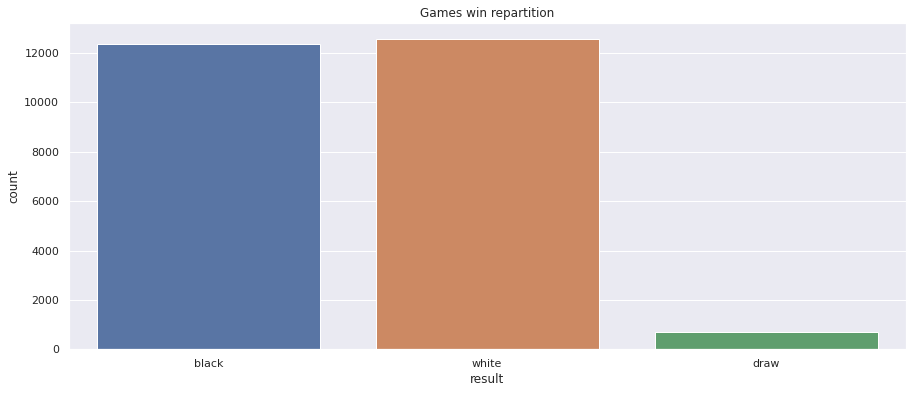

In [56]:
ax = sns.countplot(x='result', data=df)
_ = ax.set_title('Games win repartition')

### Next move repartition

In [63]:
# Count the occurence of each move-reply combination
# e.g. coutn how many time the move f5 is folowed by d6
col_count = np.zeros((8, 8))
row_count = np.zeros((8, 8))
move_count = np.zeros((64, 64))

# Array index
col_index = lambda c : ord(c) - 97
row_index = lambda r : int(r) - 1
move_index = lambda m : col_index(m[0]) * 8 + row_index(m[1])

# Loop through each game
for moves_str in df['moves']:
    # Split each move
    moves = [moves_str[i:i+2] for i in range(0, len(moves_str), 2)]

    for i in range(len(moves) - 1):
        # Move combination
        x, y = move_index(moves[i]), move_index(moves[i + 1])
        move_count[x, y] += 1

        # Column combination
        x, y = col_index(moves[i][0]), col_index(moves[i + 1][0])
        col_count[x, y] += 1

        # Row combination
        x, y = row_index(moves[i][1]), row_index(moves[i + 1][1])
        row_count[x, y] += 1

# Dataframes
letters = [chr(97 + c) for c in range(8)]
numbers = [n + 1 for n in range(8)]
cells = [l + str(n) for l in letters for n in numbers]

move_frequency = pd.DataFrame(move_count, columns=cells, index=cells)
col_frequency = pd.DataFrame(col_count, columns=letters, index=letters)
row_frequency = pd.DataFrame(row_count, columns=numbers, index=numbers)

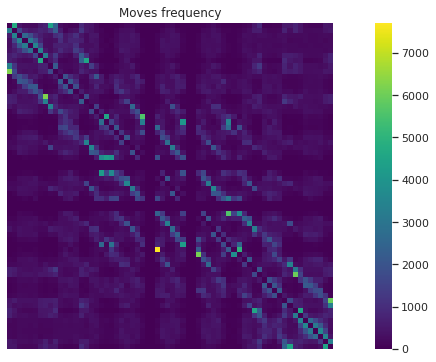

In [80]:
ax = sns.heatmap(move_frequency, xticklabels=False, yticklabels=False, cmap='viridis', square=True)
_ = ax.set_title('Moves frequency')

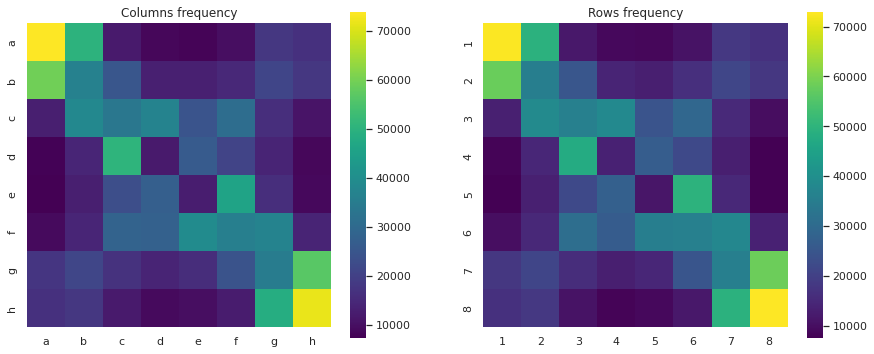

In [77]:
fig, axs = plt.subplots(ncols=2)
axs[0].set_title('Columns frequency')
axs[1].set_title('Rows frequency')

_ = sns.heatmap(col_frequency, ax=axs[0], xticklabels=True, yticklabels=True, cmap='viridis', square=True)
_ =sns.heatmap(row_frequency, ax=axs[1], xticklabels=True, yticklabels=True, cmap='viridis', square=True)